### Data Loader

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

In [2]:
training_data = datasets.FashionMNIST(root='.', train=True, download=True, transform=ToTensor())
test_data = datasets.FashionMNIST(root='.', train=False, download=True, transform=ToTensor())

In [3]:
training_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

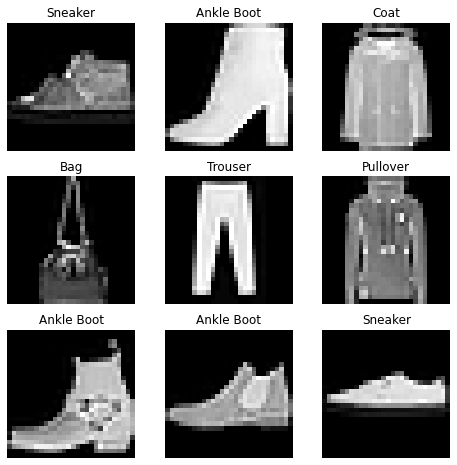

In [5]:
fig, ax = plt.subplots(3, 3, figsize=(8,8))
cols, rows = 3, 3
for col in range(cols):
    for row in range(rows):
        sample_idx = torch.randint(len(training_data), size=(1,)).item()
        img, label = training_data[sample_idx]
        ax[col][row].set_title(f'{labels_map[label]}')
        ax[col][row].imshow(img.squeeze(), cmap='gray')
        ax[col][row].axis('off')
plt.show()

In [6]:
import os
import pandas as pd
import torchvision.io as tvio

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    def __len__(self):
        return len(self.img_labels)
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = tvio.read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = {'image': image, 'label': label}
        return sample

In [7]:
from torch.utils.data import DataLoader

training_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

torch.Size([64, 1, 28, 28]) torch.Size([64])


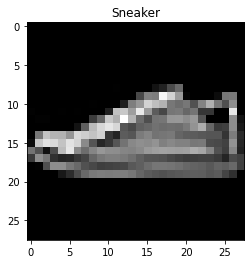

In [8]:
train_features, train_labels = next(iter(training_dataloader))
print(train_features.size(), train_labels.size())
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.title(labels_map[label.item()])
plt.show()

In [9]:
train_labels

tensor([7, 3, 5, 2, 0, 3, 0, 7, 3, 2, 2, 3, 8, 0, 1, 6, 4, 2, 4, 0, 6, 7, 6, 9,
        1, 1, 5, 5, 2, 3, 6, 7, 8, 5, 8, 7, 0, 5, 6, 5, 9, 8, 1, 0, 3, 8, 1, 1,
        3, 1, 5, 7, 6, 3, 1, 0, 9, 8, 8, 9, 5, 8, 9, 1])

In [10]:
ds = datasets.FashionMNIST(
    root='.',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [11]:
from torch import nn

In [12]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.line_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), 
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.line_relu_stack(x)
        return logits

In [13]:
model = NeuralNetwork().to('cpu')
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (line_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)

In [14]:
X = torch.rand(1, 28, 28)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(y_pred)

tensor([9])


In [15]:
input_image = torch.rand(3, 28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


In [16]:
flatten = nn.Flatten()
flat_image = flatten(input_image)

In [17]:
nn.Softmax(model(input_image))

Softmax(
  dim=tensor([[0.0265, 0.0509, 0.0348, 0.0322, 0.0000, 0.0675, 0.0122, 0.0000, 0.0830,
           0.1323],
          [0.0000, 0.0000, 0.0887, 0.0347, 0.0000, 0.0116, 0.0000, 0.0000, 0.0950,
           0.0967],
          [0.0000, 0.0188, 0.0545, 0.0000, 0.0000, 0.0412, 0.0274, 0.0000, 0.1186,
           0.1294]], grad_fn=<ReluBackward0>)
)

In [18]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [19]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.0975, -0.4646,  0.8462, -0.0069, -0.3134, -0.2323,  0.0871, -0.0360,
          0.1074, -0.5857,  0.1789, -0.4663, -0.3879, -0.6277, -0.1654,  0.4049,
         -0.0798,  0.1764, -0.1328,  0.0728],
        [ 0.1507, -0.1780,  0.7024,  0.0518,  0.0339,  0.1202, -0.1751, -0.3060,
          0.2260, -0.3171, -0.2287, -0.3181, -0.3682, -0.6227, -0.0925,  0.7629,
         -0.4109,  0.1618,  0.0802,  0.2609],
        [ 0.1692, -0.6434,  0.4929,  0.1156,  0.1868, -0.0598,  0.0068, -0.1408,
          0.2723, -0.3340, -0.4527, -0.2687, -0.2330, -0.6454, -0.1590,  0.6010,
          0.0899,  0.1846,  0.0175,  0.2703]], grad_fn=<AddmmBackward>)


After ReLU: tensor([[0.0975, 0.0000, 0.8462, 0.0000, 0.0000, 0.0000, 0.0871, 0.0000, 0.1074,
         0.0000, 0.1789, 0.0000, 0.0000, 0.0000, 0.0000, 0.4049, 0.0000, 0.1764,
         0.0000, 0.0728],
        [0.1507, 0.0000, 0.7024, 0.0518, 0.0339, 0.1202, 0.0000, 0.0000, 0.2260,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.000

In [20]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [21]:
logits.size()

torch.Size([3, 10])

In [22]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [23]:
pred_probab

tensor([[0.1217, 0.1230, 0.0770, 0.0914, 0.1327, 0.0812, 0.0721, 0.0997, 0.0735,
         0.1276],
        [0.0990, 0.1320, 0.0886, 0.0974, 0.1275, 0.0721, 0.0765, 0.0919, 0.0706,
         0.1443],
        [0.1140, 0.1261, 0.0912, 0.0845, 0.1257, 0.0804, 0.0884, 0.0922, 0.0788,
         0.1187]], grad_fn=<SoftmaxBackward>)

In [24]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (line_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: line_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0030, -0.0014, -0.0338,  ..., -0.0317,  0.0328,  0.0008],
        [ 0.0017, -0.0186,  0.0080,  ...,  0.0103,  0.0021, -0.0264]],
       grad_fn=<SliceBackward>) 

Layer: line_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0073,  0.0020], grad_fn=<SliceBackward>) 

Layer: line_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0258, -0.0167, -0.0431,  ...,  0.0419, -0.0111, -0.0097],
        [ 0.0206,  0.0069, -0.0058,  ...,  0.0007, -0.0121, -0.0032]],
       grad_fn=<SliceBackward>) 

Layer: line_relu_stack.2.bi

In [25]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

In [26]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
    StandardTransform
Transform: ToTensor()

In [27]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: .
    Split: Test
    StandardTransform
Transform: ToTensor()

In [30]:
training_dataloader

In [31]:
test_dataloader

In [33]:
NeuralNetwork()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (line_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)

In [34]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [36]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [38]:
len(training_data)

60000

In [42]:
enumerate(training_dataloader)

In [47]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):        
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # print(batch,' ', len(X))
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [51]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(training_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.301379  [    0/60000]
loss: 1.250721  [ 6400/60000]
loss: 1.039586  [12800/60000]
loss: 1.199550  [19200/60000]
loss: 1.271846  [25600/60000]
loss: 1.146938  [32000/60000]
loss: 1.075728  [38400/60000]
loss: 1.340090  [44800/60000]
loss: 1.191586  [51200/60000]
loss: 1.247761  [57600/60000]
Test Error: 
 Accuracy: 58.3%, Avg loss: 0.018750 

Epoch 2
-------------------------------
loss: 1.097659  [    0/60000]
loss: 1.147642  [ 6400/60000]
loss: 1.107060  [12800/60000]
loss: 1.351408  [19200/60000]
loss: 1.222163  [25600/60000]
loss: 1.135472  [32000/60000]
loss: 1.487863  [38400/60000]
loss: 1.031504  [44800/60000]
loss: 1.077806  [51200/60000]
loss: 1.313666  [57600/60000]
Test Error: 
 Accuracy: 58.8%, Avg loss: 0.018415 

Epoch 3
-------------------------------
loss: 1.154952  [    0/60000]
loss: 1.192277  [ 6400/60000]
loss: 1.155669  [12800/60000]
loss: 1.327396  [19200/60000]
loss: 0.984707  [25600/60000]
loss: 1.196249  [32000/600

In [53]:
model.parameters()

<generator object Module.parameters at 0x1355ad4d0>

In [54]:
model.state_dict()

OrderedDict([('line_relu_stack.0.weight',
              tensor([[ 0.0030, -0.0014, -0.0338,  ..., -0.0313,  0.0328,  0.0008],
                      [ 0.0017, -0.0186,  0.0079,  ...,  0.0098,  0.0020, -0.0264],
                      [-0.0053, -0.0242,  0.0207,  ..., -0.0166,  0.0150, -0.0191],
                      ...,
                      [-0.0218, -0.0194, -0.0045,  ..., -0.0097,  0.0056, -0.0156],
                      [-0.0128,  0.0080,  0.0261,  ..., -0.0010,  0.0305,  0.0144],
                      [-0.0333,  0.0053,  0.0008,  ...,  0.0072, -0.0288,  0.0043]])),
             ('line_relu_stack.0.bias',
              tensor([-8.8711e-03,  9.4875e-03, -5.7390e-03,  1.6919e-02, -7.1484e-03,
                      -2.5169e-02, -2.1012e-02, -2.2411e-02,  6.3563e-04,  2.9594e-02,
                      -1.3037e-02,  5.3384e-02, -3.9386e-03, -8.5686e-03, -3.5057e-02,
                      -1.0690e-02,  3.0353e-02,  1.8828e-02,  8.3908e-03, -1.9589e-02,
                       3.4404e-02,  

In [55]:
torch.save(model.state_dict(), 'model_weights.pth')

In [56]:
model_load = NeuralNetwork()
model_load.load_state_dict(torch.load('model_weights.pth'))

<All keys matched successfully>

In [57]:
model_load.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (line_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)

In [59]:
torch.save(model, 'model.pth')

In [60]:
model_load = torch.load('model.pth')

In [61]:
import torch.onnx as onnx